In [107]:
import pandas as pd
from scipy.stats import wilcoxon, 
from sklearn.metrics import accuracy_score, f1_score, auc, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from matplotlib import pyplot as plt

In [45]:
folds = [i for i in range(10)]
result_data ={fold: pd.read_csv(f"results/meta_results_fold_{fold}_adapt_1.csv", index_col=1) for fold in folds}



for fold in folds:
    result_data[fold] = result_data[fold].drop(result_data[fold].columns[0], axis=1)
    result_data[fold].loc[:, ["train_acc_BB", "train_acc_coBB", "train_acc_DT", "test_acc_BB", "test_acc_coBB", "test_acc_DT"]]*=100

    result_data[fold].loc[:, ["fidel_BB_DT", "fidel_coBB_DT1", "fidel_coBB_DT2",
    "test_acc_BB_DT", "test_acc_coBB_DT1", "test_acc_coBB_DT2",
    "train_acc_BB_DT", "train_acc_coBB_DT1", "train_acc_coBB_DT2",
    "test_acc_BB_DT", "test_acc_coBB_DT1", "test_acc_coBB_DT2"]]*=100

    result_data[fold][["train_acc_BB", "train_acc_coBB", "test_acc_BB", "test_acc_coBB", "test_acc_coBB", "test_acc_DT"]] = result_data[fold][["train_acc_BB", "train_acc_coBB", "test_acc_BB", "test_acc_coBB", "test_acc_coBB", "test_acc_DT"]].round(2)


    result_data[fold].loc[:, ["fidel_BB_DT", "fidel_coBB_DT1", "fidel_coBB_DT2",
    "test_acc_BB_DT", "test_acc_coBB_DT1", "test_acc_coBB_DT2",
    "train_acc_BB_DT", "train_acc_coBB_DT1", "train_acc_coBB_DT2",
    "test_acc_BB_DT", "test_acc_coBB_DT1", "test_acc_coBB_DT2",]] = result_data[fold].loc[:, ["fidel_BB_DT", "fidel_coBB_DT1", "fidel_coBB_DT2",
    "test_acc_BB_DT", "test_acc_coBB_DT1", "test_acc_coBB_DT2",
    "train_acc_BB_DT", "train_acc_coBB_DT1", "train_acc_coBB_DT2",
    "test_acc_BB_DT", "test_acc_coBB_DT1", "test_acc_coBB_DT2",]].round(2)
    
final = pd.concat([result_data[i] for i in folds]).groupby(level=0)

In [47]:
final
mean = final.mean().round(2)
mean   

,fidel_BB_DT,fidel_coBB_DT1,fidel_coBB_DT2,test_acc_BB_DT,test_acc_coBB_DT1,test_acc_coBB_DT2,train_acc_BB_DT,train_acc_coBB_DT1,train_acc_coBB_DT2,depth_BB_DT,depth_coBB_DT1,depth_coBB_DT2,depth_DT,test_acc_BB,test_acc_coBB,train_acc_BB,train_acc_coBB,test_acc_DT,train_acc_DT
datasets,,,,,,,,,,,,,,,,,,,
bank_marketing,95.97,96.18,96.49,91.29,90.42,90.81,91.67,90.68,91.23,4.3,3.8,4.2,3.7,90.99,90.68,93.16,91.53,90.81,91.99
german_credit,77.30,81.25,81.50,69.15,71.50,71.55,74.71,73.06,74.11,3.8,4.5,4.4,3.6,74.75,75.65,89.16,80.93,71.05,75.78
ionosphere,87.32,90.28,88.87,88.03,87.18,86.34,93.43,90.93,91.89,3.4,3.2,3.4,2.1,90.56,90.98,99.71,94.50,90.28,91.32
magic_gamma,93.31,93.15,95.60,80.79,77.04,79.16,81.08,77.00,79.11,5.0,3.9,5.0,5.0,82.79,80.57,82.78,80.33,82.72,83.75
pima_indian_diabetes,88.44,88.90,92.01,72.40,71.24,71.88,76.78,73.36,73.68,3.6,3.2,3.4,3.3,75.39,73.12,78.81,75.47,72.02,79.35
waveform,80.26,80.52,80.86,76.43,76.38,76.71,79.42,77.62,78.86,4.9,5.0,4.9,4.7,86.15,85.97,88.20,87.18,75.24,80.02
wine,89.17,92.78,89.72,89.17,91.67,88.89,96.69,94.36,96.55,2.7,3.0,2.6,2.6,97.50,96.94,100.00,99.65,87.78,95.92


In [17]:
mean = final.mean().round(2)
mean   

,fidel_BB_DT,fidel_coBB_DT1,fidel_coBB_DT2,test_acc_BB_DT,test_acc_coBB_DT1,test_acc_coBB_DT2,train_acc_BB_DT,train_acc_coBB_DT1,train_acc_coBB_DT2,depth_BB_DT,depth_coBB_DT1,depth_coBB_DT2,depth_DT,test_acc_BB,test_acc_coBB,train_acc_BB,train_acc_coBB,test_acc_DT,train_acc_DT
datasets,,,,,,,,,,,,,,,,,,,
bank_marketing,95.85,96.41,96.72,91.70,90.66,91.12,91.53,90.60,91.00,4.0,4.0,4.2,4.2,91.24,91.04,93.53,91.19,91.50,92.27
german_credit,77.60,82.40,82.80,69.90,72.20,74.00,74.35,72.70,73.83,3.8,4.6,4.4,3.4,75.30,76.40,90.37,80.75,71.90,74.80
ionosphere,85.35,89.86,90.14,85.92,85.07,85.35,93.71,91.43,92.86,3.4,3.2,4.0,2.0,89.30,88.45,99.71,94.86,88.45,91.50
magic_gamma,91.38,92.75,95.61,82.65,76.40,78.98,83.20,76.66,79.06,5.0,3.6,5.0,5.0,85.13,80.48,85.39,80.43,82.59,83.83
pima_indian_diabetes,88.44,88.70,91.17,72.60,71.69,71.30,76.81,73.65,73.29,3.2,3.2,3.2,3.0,75.07,73.12,79.15,75.54,71.82,78.57
waveform,80.10,81.08,81.36,76.54,77.52,77.76,78.99,77.52,78.55,4.8,5.0,4.8,4.8,86.46,86.28,88.11,87.21,75.54,80.40
wine,89.45,94.44,88.89,89.45,92.22,87.22,97.04,94.22,96.90,2.6,3.2,2.6,2.8,97.22,96.11,100.00,99.72,87.78,96.48


In [14]:
mean = final.mean().round(2)
mean   

,fidel_BB_DT,fidel_coBB_DT1,fidel_coBB_DT2,test_acc_BB_DT,test_acc_coBB_DT1,test_acc_coBB_DT2,train_acc_BB_DT,train_acc_coBB_DT1,train_acc_coBB_DT2,depth_BB_DT,depth_coBB_DT1,depth_coBB_DT2,test_acc_BB,test_acc_coBB,train_acc_BB,train_acc_coBB
datasets,,,,,,,,,,,,,,,,
bank_marketing,95.75,96.41,96.75,91.60,90.66,91.14,91.50,90.60,90.99,3.8,4.0,4.2,91.24,91.04,93.53,91.19
german_credit,77.60,82.40,82.80,69.90,72.20,74.00,74.35,72.70,73.83,3.8,4.6,4.4,75.30,76.40,90.37,80.75
ionosphere,87.32,89.86,92.96,87.32,85.07,86.48,94.43,91.43,92.86,3.6,3.2,4.0,89.30,88.45,99.71,94.86
magic_gamma,91.38,92.75,95.61,82.65,76.40,78.98,83.20,76.66,79.06,5.0,3.6,5.0,85.13,80.48,85.39,80.43
pima_indian_diabetes,88.96,88.57,91.17,72.60,71.56,71.30,76.97,73.65,73.29,3.4,3.2,3.2,75.07,73.12,79.15,75.54
waveform,80.10,81.06,81.36,76.54,77.50,77.76,78.99,77.52,78.55,4.8,5.0,4.8,86.46,86.28,88.11,87.21
wine,89.45,94.44,91.11,89.45,92.78,89.45,97.04,95.07,97.18,2.6,3.6,2.8,97.22,96.11,100.00,99.72


In [3]:
mean = final.mean().round(2)
mean    

,fidel_BB_DT,fidel_coBB_DT1,fidel_coBB_DT2,test_acc_BB_DT,test_acc_coBB_DT1,test_acc_coBB_DT2,train_acc_BB_DT,train_acc_coBB_DT1,train_acc_coBB_DT2,depth_BB_DT,depth_coBB_DT1,depth_coBB_DT2,test_acc_BB,test_acc_coBB,train_acc_BB,train_acc_coBB
datasets,,,,,,,,,,,,,,,,
bank_marketing,95.68,96.92,96.58,91.67,90.27,90.71,91.45,90.42,90.84,3.6,4.0,4.2,91.24,91.16,93.53,91.03
german_credit,77.60,83.40,82.10,69.90,72.30,72.20,74.35,73.60,74.00,3.8,4.2,4.4,75.30,76.90,90.37,80.75
ionosphere,85.92,92.11,92.39,87.89,83.66,84.51,91.86,87.00,90.57,2.6,2.6,3.8,87.32,85.35,97.71,91.00
magic_gamma,93.98,96.59,97.56,80.14,77.49,77.92,80.30,77.65,78.03,5.0,5.0,5.0,81.68,78.58,82.03,78.76
pima_indian_diabetes,88.96,87.14,90.52,72.60,65.84,67.92,76.97,69.09,69.80,3.4,3.2,2.8,75.07,70.39,79.15,71.40
wine,88.33,91.67,91.67,88.33,92.78,90.00,97.04,96.48,96.34,2.6,3.8,2.4,97.22,96.11,100.00,99.72


In [4]:
std = final.std().round(2)
std

,fidel_BB_DT,fidel_coBB_DT1,fidel_coBB_DT2,test_acc_BB_DT,test_acc_coBB_DT1,test_acc_coBB_DT2,train_acc_BB_DT,train_acc_coBB_DT1,train_acc_coBB_DT2,depth_BB_DT,depth_coBB_DT1,depth_coBB_DT2,test_acc_BB,test_acc_coBB,train_acc_BB,train_acc_coBB
datasets,,,,,,,,,,,,,,,,
bank_marketing,0.94,0.29,0.48,0.60,0.43,0.61,0.51,0.24,0.24,0.89,1.41,0.45,1.00,0.33,1.84,0.29
german_credit,4.02,4.63,5.12,4.10,3.75,3.09,3.03,1.36,0.84,1.30,1.30,0.55,3.13,3.38,5.40,0.75
ionosphere,1.99,3.09,1.89,3.81,4.52,3.59,2.78,3.85,1.53,1.34,1.34,0.84,4.11,2.74,1.28,1.46
magic_gamma,1.39,0.32,0.40,1.30,1.20,0.83,1.38,1.00,0.46,0.00,0.00,0.00,1.76,0.96,1.95,0.56
pima_indian_diabetes,3.73,1.62,2.58,1.61,2.45,3.00,1.11,2.65,3.38,1.14,0.84,0.84,1.18,3.27,0.95,2.59
wine,2.33,4.39,1.96,2.33,3.16,1.52,2.41,1.11,2.88,0.55,1.10,0.55,1.97,3.73,0.00,0.38


In [115]:
std = std.astype(str)
mean = mean.astype(str)

data = pd.DataFrame()
for col in list(mean):
    data[col] = mean[col] + " (" + std[col] + ")"

data

,fidel_BB_DT,fidel_coBB_DT1,fidel_coBB_DT2,test_acc_BB_DT,test_acc_coBB_DT1,test_acc_coBB_DT2,train_acc_BB_DT,train_acc_coBB_DT1,train_acc_coBB_DT2,depth_BB_DT,depth_coBB_DT1,depth_coBB_DT2,depth_DT,test_acc_BB,test_acc_coBB,train_acc_BB,train_acc_coBB,test_acc_DT,train_acc_DT
datasets,,,,,,,,,,,,,,,,,,,
bank_marketing,95.97 (0.74),96.18 (0.63),96.49 (0.89),91.29 (0.94),90.42 (1.0),90.81 (0.99),91.67 (0.48),90.68 (0.35),91.23 (0.42),4.3 (0.95),3.8 (1.03),4.2 (0.79),3.7 (0.95),90.99 (0.84),90.68 (0.77),93.16 (1.3),91.53 (0.45),90.81 (0.96),91.99 (0.78)
german_credit,77.3 (3.47),81.25 (3.47),81.5 (3.43),69.15 (3.33),71.5 (2.59),71.55 (4.7),74.71 (3.34),73.06 (3.01),74.11 (1.82),3.8 (1.23),4.5 (0.71),4.4 (1.07),3.6 (1.17),74.75 (3.5),75.65 (3.88),89.16 (3.84),80.93 (1.17),71.05 (3.3),75.78 (2.73)
ionosphere,87.32 (3.25),90.28 (3.42),88.87 (5.69),88.03 (3.89),87.18 (4.01),86.34 (3.45),93.43 (1.96),90.93 (1.55),91.89 (1.47),3.4 (1.35),3.2 (1.03),3.4 (0.97),2.1 (0.32),90.56 (3.45),90.98 (3.88),99.71 (0.23),94.5 (1.11),90.28 (4.43),91.32 (0.83)
magic_gamma,93.31 (2.08),93.15 (0.85),95.6 (0.36),80.79 (2.09),77.04 (1.12),79.16 (0.37),81.08 (2.25),77.0 (0.69),79.11 (0.29),5.0 (0.0),3.9 (0.99),5.0 (0.0),5.0 (0.0),82.79 (2.53),80.57 (0.49),82.78 (2.75),80.33 (0.21),82.72 (0.43),83.75 (0.34)
pima_indian_diabetes,88.44 (2.41),88.9 (1.35),92.01 (3.24),72.4 (1.44),71.24 (3.17),71.88 (2.12),76.78 (0.9),73.36 (2.73),73.68 (2.37),3.6 (0.97),3.2 (1.03),3.4 (1.07),3.3 (1.25),75.39 (1.77),73.12 (2.31),78.81 (0.77),75.47 (2.12),72.02 (2.59),79.35 (2.82)
waveform,80.26 (1.53),80.52 (1.87),80.86 (1.28),76.43 (1.9),76.38 (1.83),76.71 (1.58),79.42 (1.17),77.62 (0.82),78.86 (1.09),4.9 (0.32),5.0 (0.0),4.9 (0.32),4.7 (0.48),86.15 (0.7),85.97 (0.87),88.2 (0.22),87.18 (0.83),75.24 (1.23),80.02 (1.88)
wine,89.17 (4.62),92.78 (4.93),89.72 (2.64),89.17 (3.33),91.67 (4.54),88.89 (3.93),96.69 (2.99),94.36 (2.87),96.55 (2.58),2.7 (0.67),3.0 (1.05),2.6 (0.52),2.6 (0.7),97.5 (2.05),96.94 (2.43),100.0 (0.0),99.65 (0.37),87.78 (4.93),95.92 (3.08)


In [ ]:
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.plot(metrics_with["cross_entropy"][:N], color='red', alpha = 0.4, label="cross_entropy_coBB", linewidth=2.)
plt.plot(metrics_with["shareloss1"][:N], color='blue', alpha = 0.4, label="add_KL", linewidth=2.)

plt.xlabel("Epochs")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(metrics_with["expected_loglikel"][:N], color='blue', alpha = 0.4, label="neg_expected_log_LL", linewidth=2.)

plt.xlabel("Epochs")
#plt.scale('log')

plt.legend()
plt.savefig(f"results/{dataset_name}_losses_c_bis.png", bbox_inches = 'tight', pad_inches = 0, dpi=300)

datasets
bank_marketing          91.04
german_credit           76.40
ionosphere              88.45
magic_gamma             80.48
pima_indian_diabetes    73.12
waveform                86.28
wine                    96.11
Name: test_acc_coBB, dtype: float64

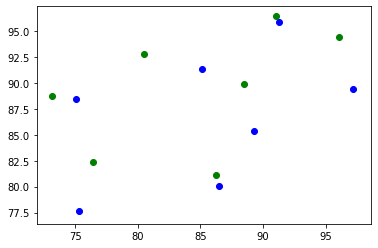

In [44]:
fig, ax = plt.subplots()
ax.scatter(mean["test_acc_coBB"], mean["fidel_coBB_DT1"], color = "green")
ax.scatter(mean["test_acc_BB"], mean["fidel_BB_DT"], color = "blue")

In [36]:
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))


dict_keys(['bank_marketing', 'german_credit', 'ionosphere', 'magic_gamma', 'pima_indian_diabetes', 'waveform', 'wine'])

In [119]:
with open("results/fidelity_adapt_1.tex", "w") as f:
    f.write(data[["fidel_BB_DT", "fidel_coBB_DT1", "fidel_coBB_DT2"
   ]].to_latex())
    
with open("results/accuracy_adapt_1.tex", "w") as f:
    f.write(data[[ 
    "train_acc_BB_DT", "train_acc_coBB_DT1", "train_acc_coBB_DT2",
    "test_acc_BB_DT", "test_acc_coBB_DT1", "test_acc_coBB_DT2"
   ]].to_latex())
 

In [116]:
 with open(f'results/impact_accuracy_bb_adapt_1.tex', "w") as f:
    f.write(data[[ "test_acc_BB", "test_acc_coBB", "test_acc_DT"]].to_latex()) 
     

In [114]:
for data in range(7):
    val1 = [  result_data[fold]["fidel_coBB_DT1"].iloc[data] for fold in folds[:10]]
    val2 = [ result_data[fold]["fidel_BB_DT"].iloc[data]  for fold in folds]
    #print(val)
    print(wilcoxon(val1,val2))

WilcoxonResult(statistic=6.5, pvalue=0.10603481579165039)
WilcoxonResult(statistic=21.0, pvalue=0.5065181778238972)
WilcoxonResult(statistic=25.0, pvalue=0.7988593499960496)
WilcoxonResult(statistic=27.0, pvalue=0.9591944787097265)
WilcoxonResult(statistic=4.5, pvalue=0.0583979067493014)
WilcoxonResult(statistic=4.0, pvalue=0.028263033165028862)
WilcoxonResult(statistic=25.0, pvalue=0.7988593499960496)


/home/gnanfack/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(array([1., 3., 3., 0., 2., 0., 0., 0., 0., 1.]),
 array([-5.56 , -3.615, -1.67 ,  0.275,  2.22 ,  4.165,  6.11 ,  8.055,
        10.   , 11.945, 13.89 ]),
 <a list of 10 Patch objects>)

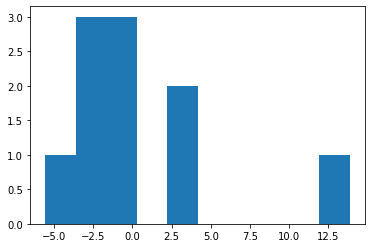

In [83]:
data = 0
plt.hist([ - result_data[fold]["fidel_BB_DT"].iloc[data] + result_data[fold]["fidel_coBB_DT2"].iloc[data] for fold in folds])

In [50]:
wilcoxon(val)

/home/gnanfack/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=3.0, pvalue=0.22491588401596185)

In [336]:
val = [ - result_data[fold]["fidel_BB_DT"].iloc[data] + result_data[fold]["fidel_coBB_DT1"].iloc[data] for fold in [0, 1, 2, 3, 4]]

In [337]:
wilcoxon(val)

WilcoxonResult(statistic=3.0, pvalue=0.2228009911811345)

In [338]:
val = [ - result_data[fold]["test_acc_BB"].iloc[data] + result_data[fold]["test_acc_coBB"].iloc[data] for fold in [0, 1, 2, 3, 4]]

In [339]:
wilcoxon(val)

WilcoxonResult(statistic=3.0, pvalue=0.4496917979688909)